# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
previsao_renda_raw= pd.read_csv('./Input/previsao_de_renda.csv')
previsao_renda_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [35]:
previsao_renda = previsao_renda_raw.select_dtypes(include=['object','bool'])
previsao_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   data_ref          15000 non-null  object
 1   sexo              15000 non-null  object
 2   posse_de_veiculo  15000 non-null  bool  
 3   posse_de_imovel   15000 non-null  bool  
 4   tipo_renda        15000 non-null  object
 5   educacao          15000 non-null  object
 6   estado_civil      15000 non-null  object
 7   tipo_residencia   15000 non-null  object
 8   mau               15000 non-null  bool  
dtypes: bool(3), object(6)
memory usage: 747.2+ KB


In [36]:
previsao_renda['renda'] = previsao_renda_raw['renda']

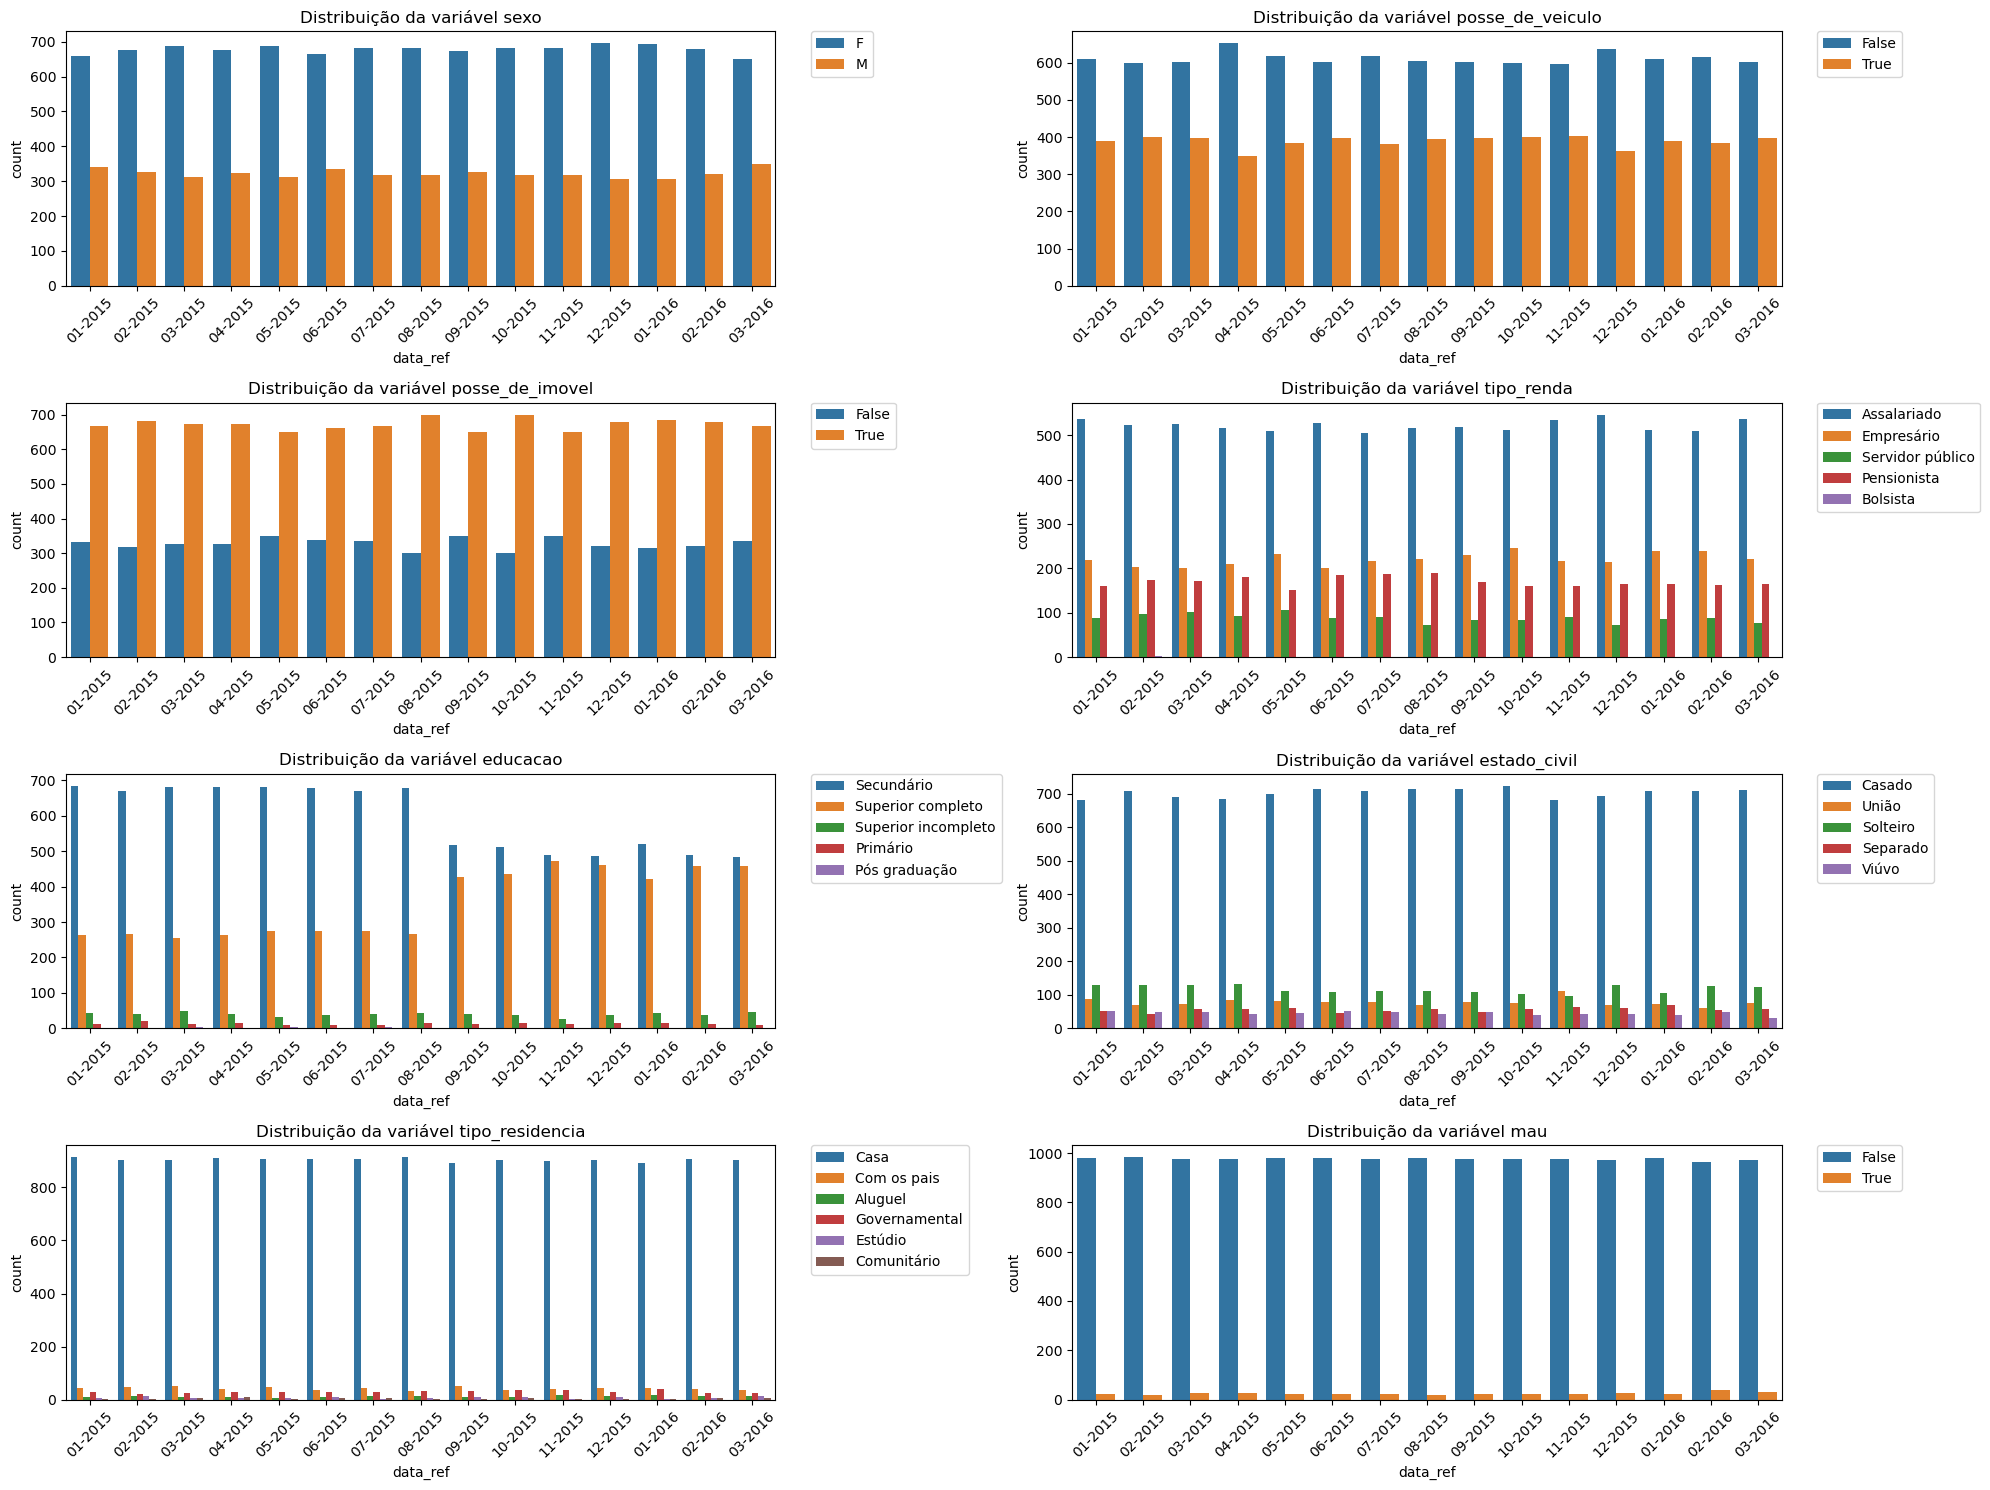

In [37]:
variaveis_hue = [
    "sexo",
    "posse_de_veiculo",
    "posse_de_imovel",
    "tipo_renda",
    "educacao",
    "estado_civil",
    "tipo_residencia",
    "mau",
]
previsao_renda["data_ref"] = pd.to_datetime(previsao_renda["data_ref"])
numero_variaveis = len(variaveis_hue)
fig, axes = plt.subplots((numero_variaveis + 1) // 2, ncols=2, figsize=[20, 15])
axes = axes.flatten()

for i, var in enumerate(variaveis_hue):
    ax = axes[i]

    sns.countplot(x="data_ref", hue=var, data=previsao_renda, ax=ax)
    tick_labs = previsao_renda["data_ref"].map(lambda ts: ts.strftime("%m-%Y")).unique()

    ticks = ax.set_xticks(list(range(previsao_renda["data_ref"].nunique())))
    labels = ax.set_xticklabels(tick_labs, rotation=45)

    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    ax.set_title(f"Distribuição da variável {var}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Resposta: A única variável que demonstrou certa instabilidade foi de ['educacao'], ela apresentando variações nos valores de 'Secundário' e 'Superior Completo', tendo uma queda e ascensão respectivamente, a partir do mês de setembro.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

##### Respostas

Abaixo desta resposta temos um aprofundamento sobre duas variáveis que utilizei para embasar minha decisão. Analisando ['tipo_renda'] e ['educacao'], observei algumas inconstâncias nas médias dos valores dessas categorias. Em especial, os casos mais evidentes foram nas médias de renda de "Empresário", "Servidor Público", "Pós-Graduação" e "Superior Incompleto".

Algumas dessas categorias parecem ter a inconstância como uma característica própria, ou seja, é quase impossível dissociar isso da natureza delas. Porém, também identifiquei situações onde havia um padrão mais constante que foi interrompido por picos inesperados, tanto de alta quanto de baixa.

Levando isso em conta, e considerando que é essencial atualizar o modelo regularmente para lidar com variáveis naturalmente voláteis, minha recomendação é realizar uma remodelagem. Com exceção das categorias 'Bolsista' em educacao, 'Comunitário' em tipo_residencia, 'Pós-Graduação' em educacao e 'Separado' em estado_civil, todas as demais apresentam condições mais consistentes. Já as categorias mencionadas mostram inconstâncias significativas e altos valores de erro padrão, o que exige atenção especial.


Resposta (variável `['tipo_renda']`): A variável ['tipo_renda'] apresenta algumas inconsistências em valores como 'Empresário' e 'Servidor Público'. A primeira se demonstra desde o começo de seu monitoramento ser bastante instável, então o modelo já leva em conta esta tendência devido a ser da natureza do próprio valor, enquanto o valor 'Servidor Público' tem um ritmo constante até o mês de Setembro porém a partir daí varia bastante para cima e para baixo, para uma melhor análise seriam necessários dados futuros para averiguar se será estabelecido uma nova média. Com as informações que temos em mãos, levando em conta a variável `['tipo_renda']` é aconselhável rever o modelo, já que nos meses finais a categoria de 'Servidor Público' apresentou uma séria instabilidade.

Resposta (variável `['educacao']`): Os valores de 'Pós Graduação'e 'Superior Incompleto' apresentam certa inconsistência, principalmente 'Pós Graduação'. Devido a estes picos e quedas é aconselhável sim serem feitas revisões no modelo implementado, apesar de aparentemente ser caracteristica intrínseca de algumas variáveis como 'Pós Graduação' ter essa inconsistência em suas médias, é necessário garantir que o modelo esteja sempre em dia com as novas necessidades geradas por estas variáveis problemáticas.

##### Código

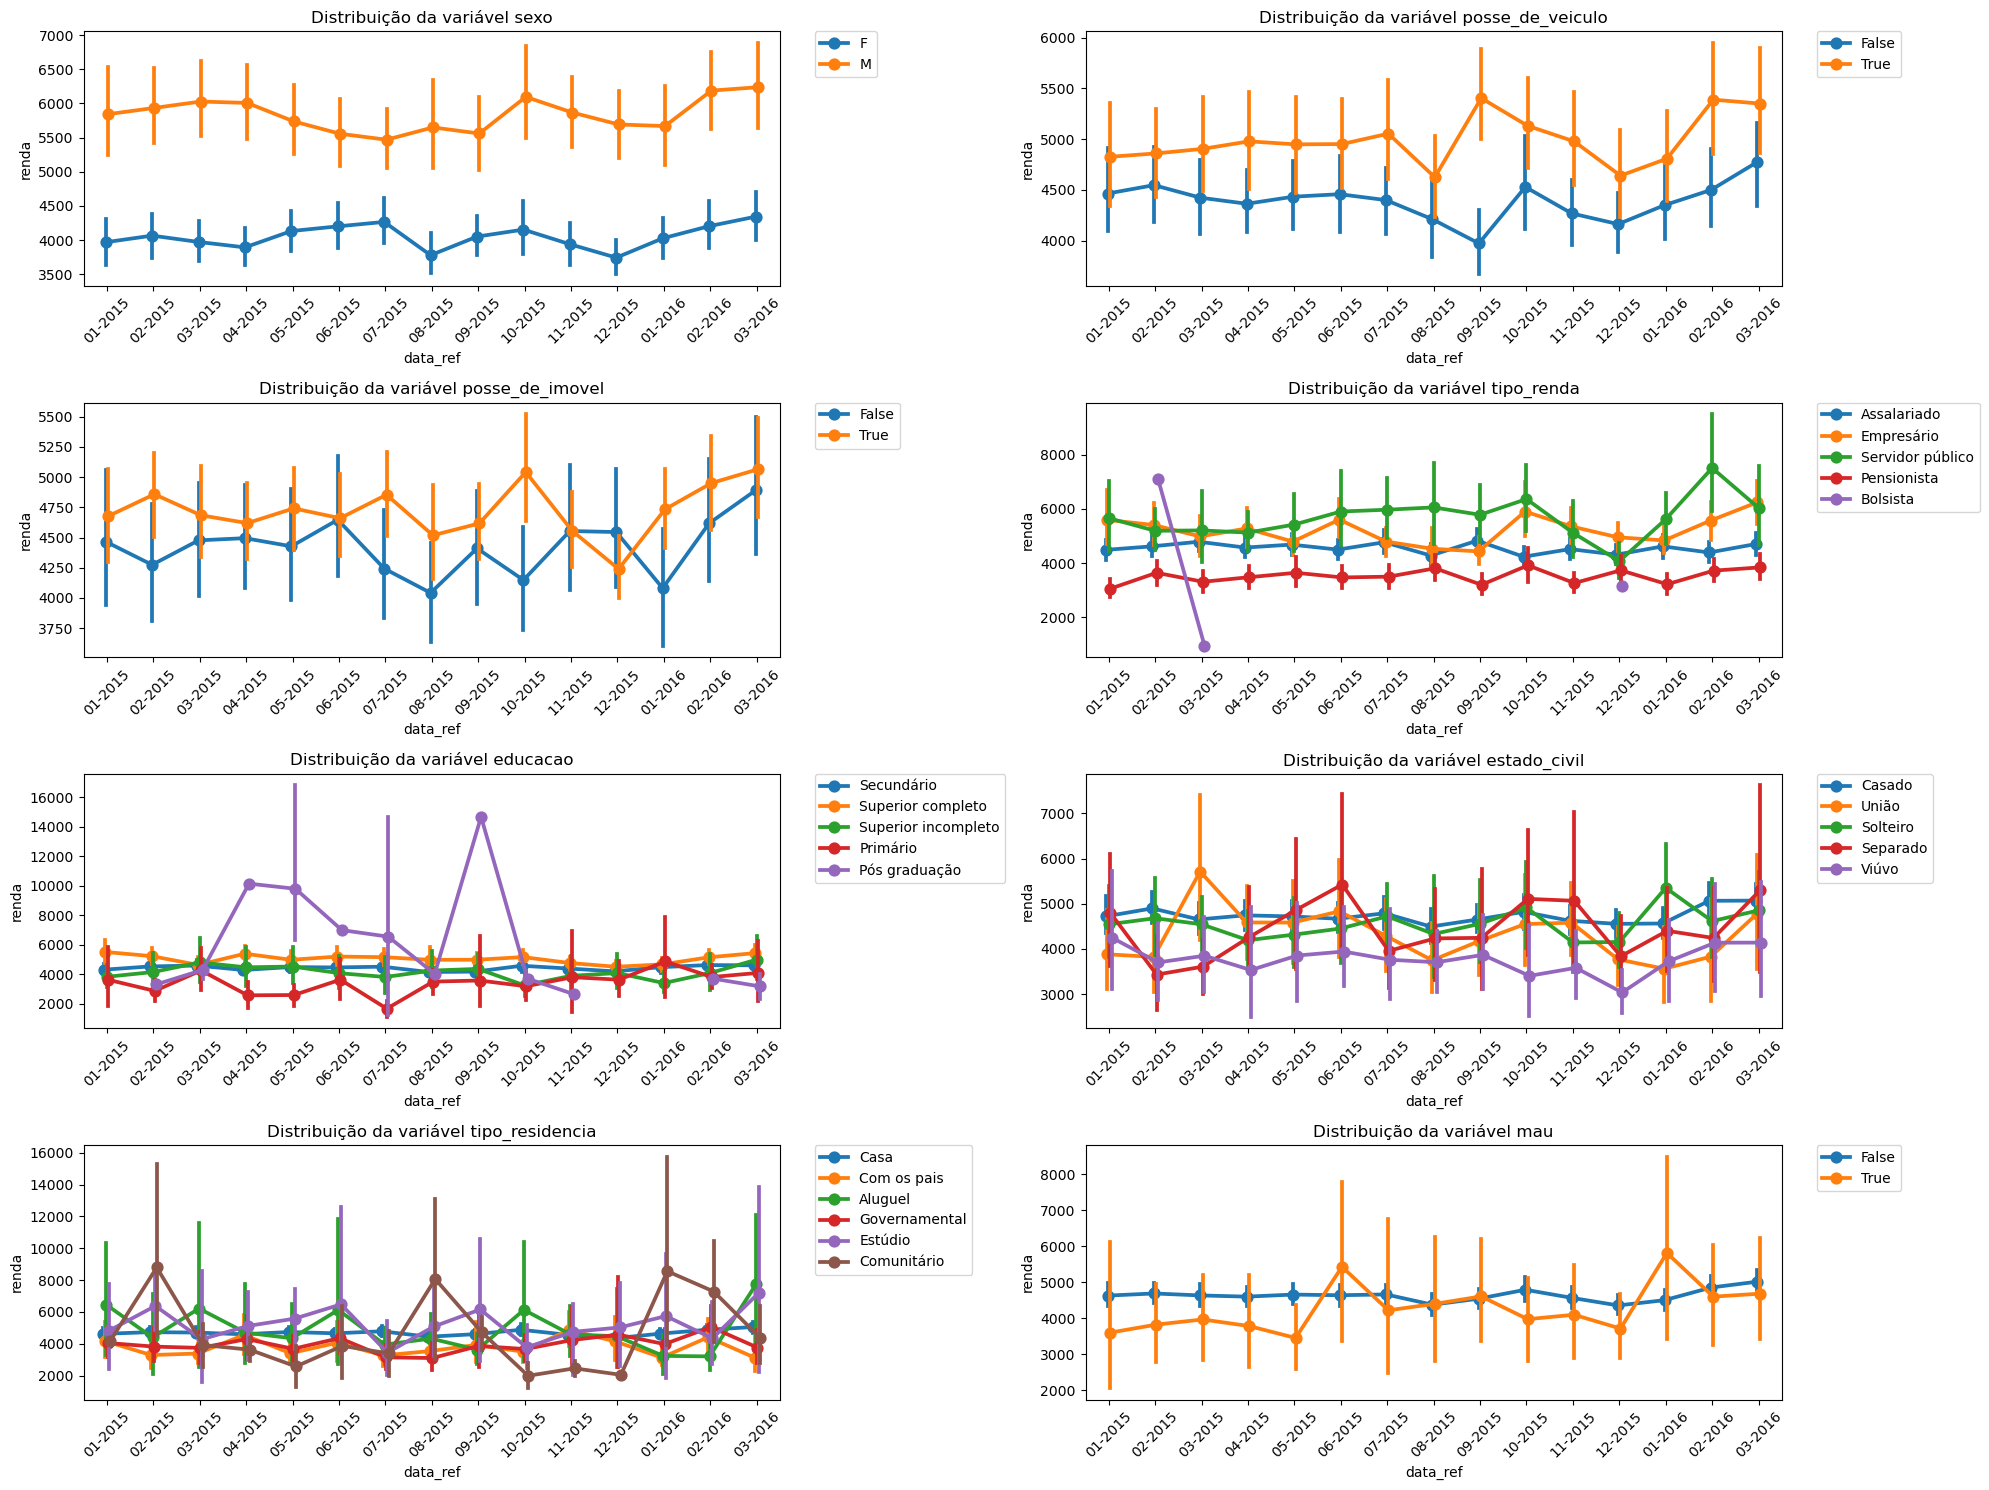

In [38]:
previsao_renda["data_ref"] = pd.to_datetime(previsao_renda["data_ref"])
numero_variaveis = len(variaveis_hue)
fig, axes = plt.subplots((numero_variaveis + 1) // 2, ncols=2, figsize=[20, 15])
axes = axes.flatten()

for i, var in enumerate(variaveis_hue):
    ax = axes[i]

    sns.pointplot(
        x="data_ref", y="renda", hue=var, data=previsao_renda, ax=ax, dodge=True, errorbar=('ci', 95)
    )
    tick_labs = previsao_renda["data_ref"].map(lambda ts: ts.strftime("%m-%Y")).unique()

    ticks = ax.set_xticks(list(range(previsao_renda["data_ref"].nunique())))
    labels = ax.set_xticklabels(tick_labs, rotation=45)

    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    ax.set_title(f"Distribuição da variável {var}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Tipo Renda

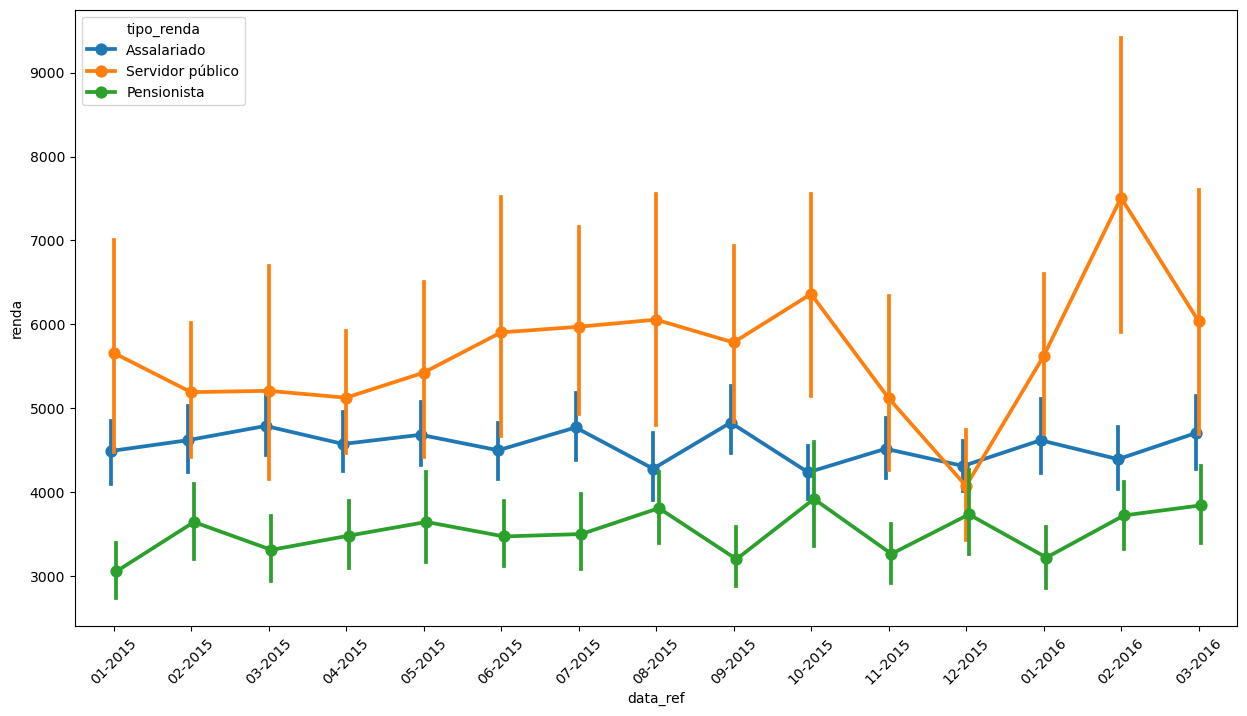

In [39]:
categorias_para_manter = ['Assalariado', 'Servidor público', 'Pensionista']

dados_filtrados = previsao_renda.loc[previsao_renda['tipo_renda'].isin(categorias_para_manter)]

plt.figure(figsize=[15,8])
ax = sns.pointplot(data=dados_filtrados, x='data_ref', y='renda', hue='tipo_renda',dodge=True, errorbar=('ci', 95))

tick_labs = previsao_renda["data_ref"].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda["data_ref"].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.show()

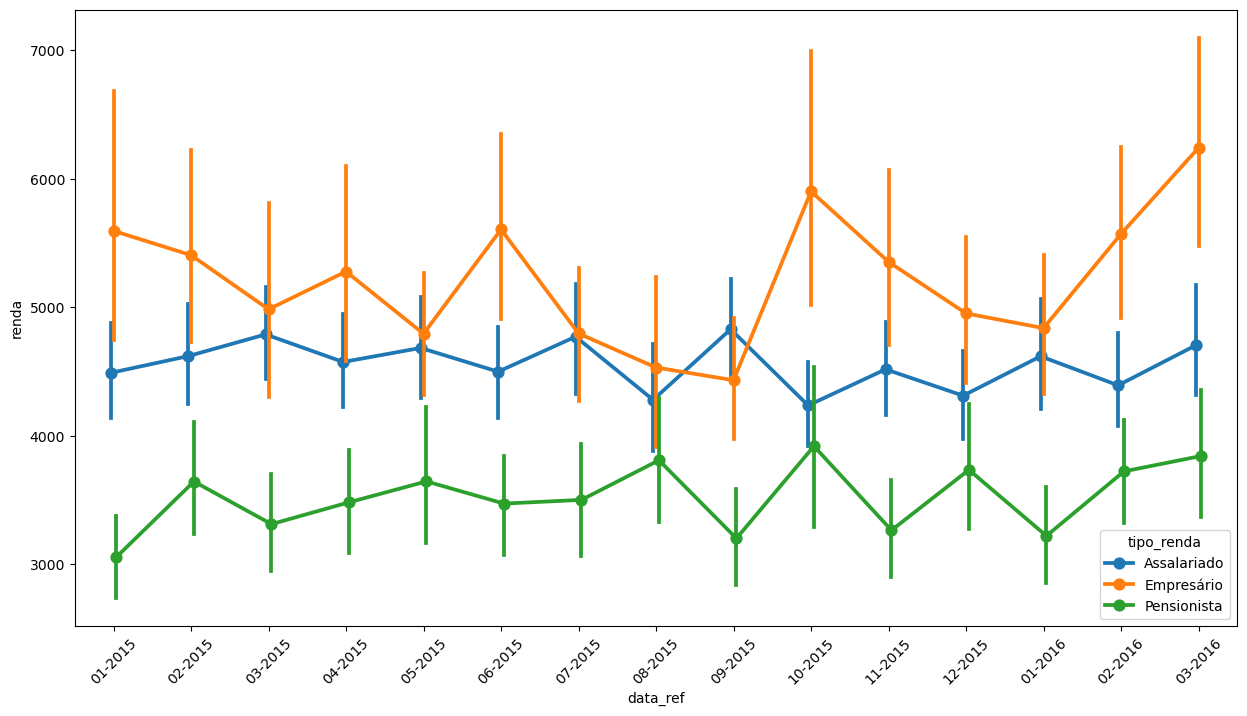

In [40]:
categorias_para_manter = ['Assalariado', 'Empresário', 'Pensionista']

dados_filtrados = previsao_renda.loc[previsao_renda['tipo_renda'].isin(categorias_para_manter)]

plt.figure(figsize=[15,8])
ax = sns.pointplot(data=dados_filtrados, x='data_ref', y='renda', hue='tipo_renda',dodge=True, errorbar=('ci', 95))

tick_labs = previsao_renda["data_ref"].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda["data_ref"].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.show()

Resposta (variável `['tipo_renda']`): A variável ['tipo_renda'] apresenta algumas inconsistências em valores como 'Empresário' e 'Servidor Público'. A primeira se demonstra desde o começo de seu monitoramento ser bastante instável, então o modelo já leva em conta esta tendência devido a ser da natureza do próprio valor, enquanto o valor 'Servidor Público' tem um ritmo constante até o mês de Setembro porém a partir daí varia bastante para cima e para baixo, para uma melhor análise seriam necessários dados futuros para averiguar se será estabelecido uma nova média. Com as informações que temos em mãos, levando em conta a variável `['tipo_renda']` é aconselhável rever o modelo, já que nos meses finais a categoria de 'Servidor Público' apresentou uma séria instabilidade.

#### Educação

In [41]:
list(previsao_renda['educacao'].unique())

['Secundário',
 'Superior completo',
 'Superior incompleto',
 'Primário',
 'Pós graduação']

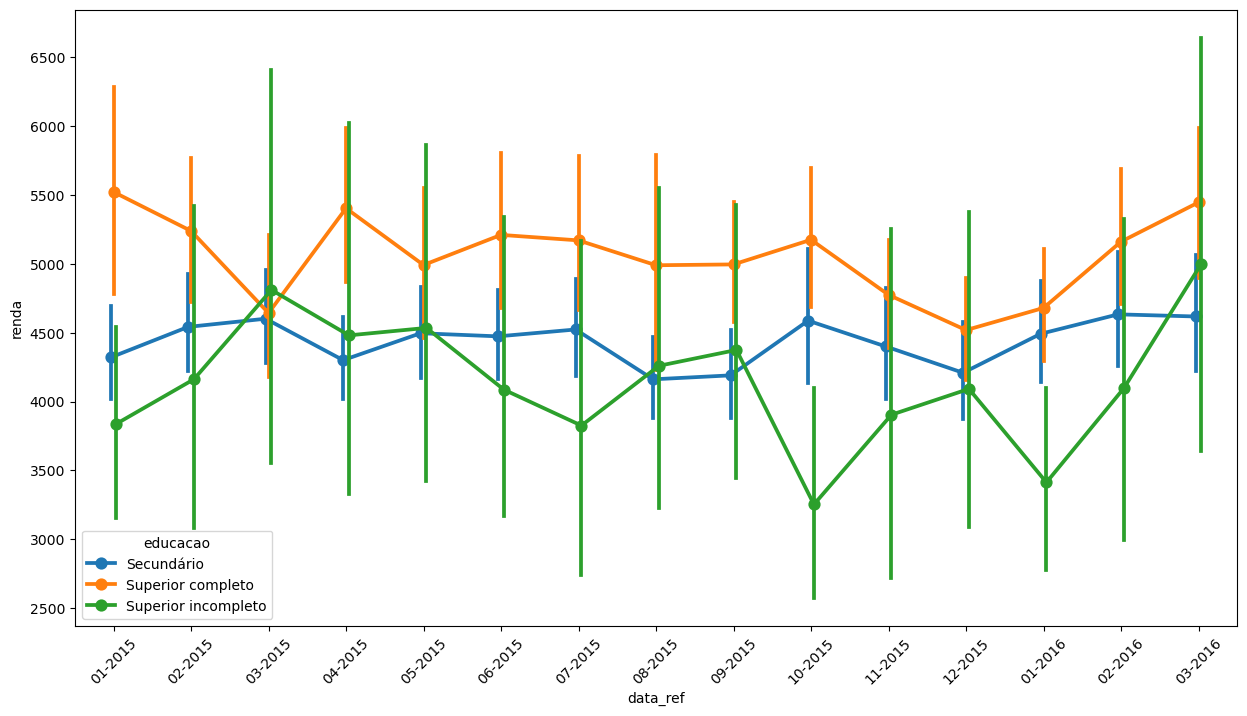

In [45]:
categorias_para_manter = [
    "Secundário",
    "Superior completo",
    "Superior incompleto",
]
dados_filtrados = previsao_renda.loc[
    previsao_renda["educacao"].isin(categorias_para_manter)
]

plt.figure(figsize=[15, 8])
ax = sns.pointplot(
    data=dados_filtrados,
    x="data_ref",
    y="renda",
    hue="educacao",
    dodge=True,
    errorbar=("ci", 95),
)

tick_labs = previsao_renda["data_ref"].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda["data_ref"].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.show()

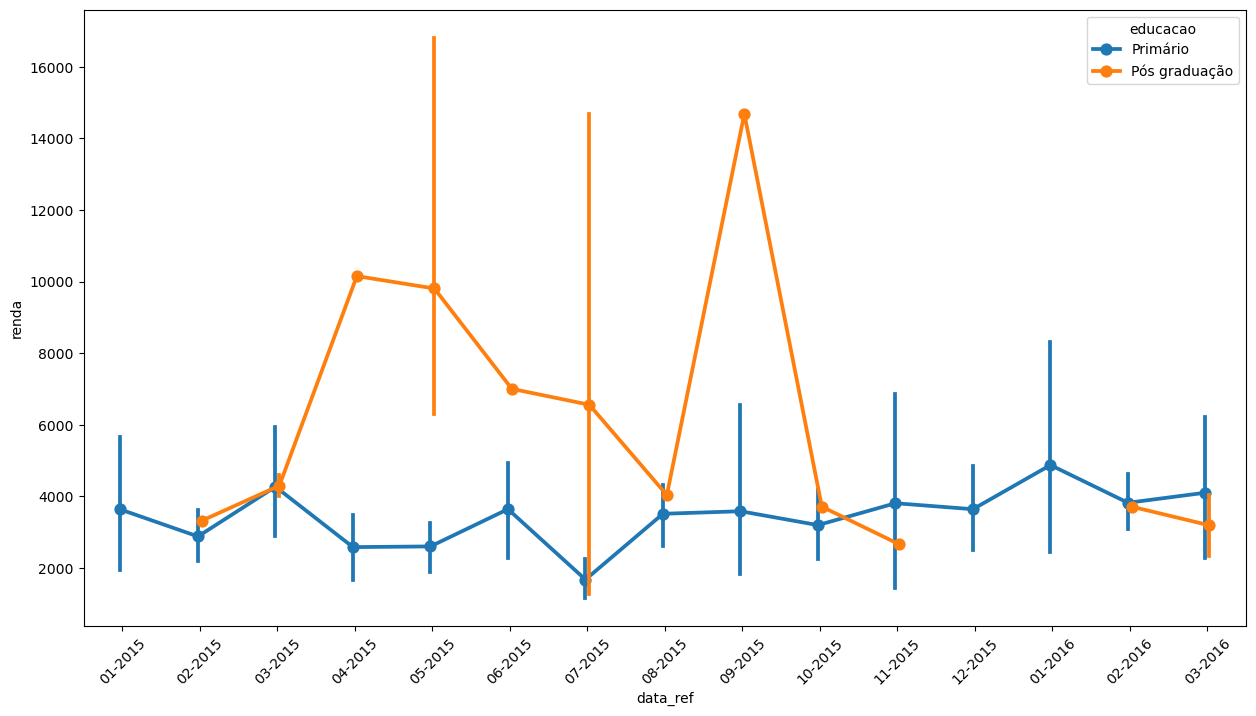

In [46]:
categorias_para_manter = [
 'Primário',
 'Pós graduação']
dados_filtrados = previsao_renda.loc[
    previsao_renda["educacao"].isin(categorias_para_manter)
]

plt.figure(figsize=[15, 8])
ax = sns.pointplot(
    data=dados_filtrados,
    x="data_ref",
    y="renda",
    hue="educacao",
    dodge=True,
    errorbar=("ci", 95),
)

tick_labs = previsao_renda["data_ref"].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda["data_ref"].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.show()

Resposta (variável `['educacao']`): Os valores de 'Pós Graduação'e 'Superior Incompleto' apresentam certa inconsistência, principlamnete 'Pós Graduação'. Devido a estes picos e quedas é aconselhável sim serem feitas revisões no modelo implementado, apesar de aparentemente ser caracteristica de algumas variáveis como 'Pós Graduação' ter essa inconsistência em suas médias, é necessário garantir que o modelo esteja sempre em dia com as novas necessidades geradas por estas variáveis problemáticas.